In [5]:
from dash import  dcc
from dash import  html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from django_plotly_dash import DjangoDash
import pandas as pd
import numpy as np
import plotly.express as px


In [40]:
df_ =pd.read_csv('df_preprocess.csv',index_col=0)
df=df_.copy()
df

,author,headline,body,rating,item_reviewed,publisher,date,year,month,words,sentiment,sentiment_value
0,insomniak,parfait aucun problème engagement tenu,parfait aucun problème engagement tenu,5,Cdiscount,Trustpilot,2021-11-15 17:47:35+01:00,2021,11,parfait aucun problème engagement tenir,positif,1
1,Guillaume,facile et rapide d'utilisation,facile et rapide dutilisation,4,Cdiscount,Trustpilot,2021-11-15 17:44:16+01:00,2021,11,facile rapide dutilisation,positif,1
2,ALAIN CONTROLE TECHNIQUE DEKRA,parfait,parfait tres bien,5,Cdiscount,Trustpilot,2021-11-15 17:35:56+01:00,2021,11,parfait bien,positif,1
3,jean jacques THEBAULT,rien a dire tout est parfait,rien a dire tout est parfait,5,Cdiscount,Trustpilot,2021-11-15 17:32:43+01:00,2021,11,rien avoir dire tout être parfait,positif,1
4,georges.hibouxgmail.com,Satisfait,satisfait de mon achat,5,Cdiscount,Trustpilot,2021-11-15 17:31:59+01:00,2021,11,satisfait achat,positif,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62975,lili91,j'ai pas de soucis avec cdiscount mais…,jai pas de soucis avec cdiscount mais bcp avec...,4,Cdiscount,Trustpilot,2020-04-13 14:48:22+02:00,2020,4,souci cdiscount vendeur market marchandise liv...,positif,1
62976,Rothen,Bravo à vous tous,bravo à vous tous,5,Cdiscount,Trustpilot,2020-04-13 14:41:18+02:00,2020,4,bravo tout,positif,1
62977,laurent delforge,bonjour bon courage.rien a dire…,bonjour bon couragerien a dire cordialement,4,Cdiscount,Trustpilot,2020-04-13 14:14:42+02:00,2020,4,bonjour couragerien avoir dire cordialement,positif,1
62978,Aaron Nano,"Après plusieurs déboires, cdiscount fini pour moi",avec cdiscount quand on veut annuler une comma...,1,Cdiscount,Trustpilot,2020-04-13 14:14:07+02:00,2020,4,cdiscount quand vouloir annuler commande impor...,negatif,3


In [41]:
df_pos=df[df['sentiment_value']==1].groupby('month')['sentiment_value','sentiment'].sum()
df_pos

<ipython-input-41-693489e6f5d5>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sentiment_value
month,
1,3188
2,2933
3,3008
4,4110
5,5127
6,5293
7,4738
8,3279
9,4708


In [42]:
df_neg=df[df['sentiment_value']==3].groupby('month')['sentiment_value','sentiment'].sum()
df_neg

<ipython-input-42-c45a2d9b87a3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sentiment_value
month,
1,972
2,1014
3,810
4,1323
5,2070
6,2307
7,2127
8,1833
9,1425


In [43]:
df_neu=df[df['sentiment_value']==2].groupby('month')['sentiment_value','sentiment'].sum()
df_neu

<ipython-input-43-de07d9969a35>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sentiment_value
month,
1,402
2,312
3,326
4,430
5,612
6,682
7,564
8,354
9,488


In [36]:
df=pd.concat([df_pos,df_neg])
df_final=pd.concat([df,df_neu])
df_final.index
# No of reviews per year

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12],
           dtype='int64', name='month')

In [18]:
list(set(df_final.index))

[2020, 2021]

In [44]:
from plotly.subplots import make_subplots
fig = go.Figure()

fig2.add_trace(go.Scatter(x=list(df_pos.index), 
                         y=df_pos['sentiment_value'],
                         mode='lines',
                         name='positive',
                         line=dict(color='rgb(0,245,153)', width=1)))
fig2.add_trace(go.Scatter(x=list(df_neg.index), 
                         y=df_neg['sentiment_value'],
                         mode='lines',
                         name='negative',
                         line=dict(color='rgb(255, 102, 102)', width=1)))
fig2.add_trace(go.Scatter(x=list(df_neu.index), 
                         y=df_neu['sentiment_value'],
                         mode='lines',
                         name='neutral',
                         line=dict(color='rgb(102, 102, 255)', width=1)))
fig2.update_layout(
     autosize=False,
     title='Sentiments over Month',
    x
    )

In [2]:
df =pd.read_csv('df_preprocess.csv',index_col=0)
column=['Unnamed: 0']
df = df.drop(column, axis=1)
print(df.head())
print(df.shape)
    

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df.head()

In [ ]:
y=list(df.index)
y

In [ ]:
df_pos = df[df['sentiment']=='positif']
df_pos

In [ ]:
fig = px.line(df, x='year', y=y, markers=True)
fig.show()

In [ ]:
df_pos=df[df['sentiment_value']==1].groupby('year')['year','sentiment_value'].sum()
df_pos

In [ ]:
df_pos=df[df['sentiment_value']==1].groupby('year')['year','sentiments'].sum()
data_most_reviewed_store_timeseries_neg=data_most_reviewed_store[data_most_reviewed_store['sentiments']==3].groupby('date_year')['date_year','sentiments'].sum()
data_most_reviewed_store_timeseries_neu=data_most_reviewed_store[data_most_reviewed_store['sentiments']==2].groupby('date_year')['date_year','sentimen

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(df.index), 
                         y=df['sentiments'],
                         mode='lines',
                         name='positive',
                         line=dict(color='rgb(0,245,153)', width=1)))
fig.add_trace(go.Scatter(x=list(df.index), 
                         y=df['sentiments'],
                         mode='lines',
                         name='negative',
                         line=dict(color='rgb(255, 102, 102)', width=1)))
fig.add_trace(go.Scatter(x=list(df.index), 
                         y=df['sentiments'],
                         mode='lines',
                         name='neutral',
                         line=dict(color='rgb(102, 102, 255)', width=1)))
fig.update_layout(
     autosize=False,
     title='Trend of sentiments over time'
    )

In [ ]:
df

In [ ]:
df1=df.sort_values(by=['date'],ascending=False)
df1=df1[['author','body','rating','sentiment']]
df1

In [ ]:
df=df.sort_values(by=['date'],ascending=False)
timezone_name = 'Europe/Paris'
df.date=df.date.dt.tz_convert(timezone_name)
df=df.sort_values(by=['date'],ascending=False)
df

In [ ]:
df=df.sort_values(by=['date'],ascending=False)
sentimments_dict={3:'Negative',2:'Neutral',1:'Positive'}
sentiment_names=[sentimments_dict[int(i)] for i in data_most_reviewed_store['sentiments'].values]
data_most_reviewed_store['sentiment']=sentiment_names
data_most_reviewed_store=data_most_reviewed_store.drop(columns=['business_id','review_id','user_id','user_id','categories'])
data_most_reviewed_store=data_most_reviewed_store[['text','sentiment','date','stars_x']]
data_most_reviewed_store=data_most_reviewed_store.rename(columns={'stars_x':'rating','text':'review'})
return data_most_reviewed_store


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import itertools
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
#import fr_core_news_md
#nlp = fr_core_news_md.load()
from matplotlib import pyplot as plt
stop_words = list(stopwords.words('french'))+['ctre','tcdicount']




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
stop_words = list(stopwords.words('french'))+['ctre','tcdicount']
stop_words

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [19]:
# https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea
def max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates):
    # Calculate distances and extract keywords
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # Get top_n words as candidates based on cosine similarity
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # Calculate the combination of words that are the least similar to each other
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

############Extraction##################""""
# Diversify the keywords using max sum similarity, higher the value of nr_candidates higher the diversity
def extract_keywords_bert_diverse(doc,top_n=100,nr_candidates=2000):
    n_gram_range = (1,1)
    # Extract candidate words/phrases using count vectorizer (TF-IDF Scores)
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
    candidates = count.get_feature_names()
    # Embeddings of the document using Bert    
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    doc_embedding = model.encode([doc])
    candidate_embeddings = model.encode(candidates)
    keywords=max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n, nr_candidates)
    return keywords
################################get_trending_keywords###################
def get_trending_keywords(pos_data,neg_data,num_keywords):
    keywords={}
    limit=list(pos_data[-1000::])
    corpus=' '.join(map(str, limit))
    print(type(corpus))
    keywords['positive']=extract_keywords_bert_diverse(corpus,num_keywords)
    limit=list(neg_data[-200::])
    corpus=' '.join(map(str, limit))
    keywords['negative']=extract_keywords_bert_diverse(corpus,num_keywords)
    return keywords



In [20]:
df_final = pd.read_csv('df_preprocess.csv')
df=df_final.copy()

In [21]:
df_pos = df[df['sentiment']=='positif']['words']
df_neg=df[df['sentiment']=='negatif']['words']

In [12]:
limit=list(df_pos[-1000::])
corpus=' '.join(map(str, limit))
print(corpus)

commande être bien livrer date prévoir cela être parfait attendre merci livraison rapide bonjourtoujours aussi satisfait discount continuer ainsi cordialement vachier large choix meilleur prix parfait rien avoir dire être fervent client jusquà maintenant très satisfait précis rapide bien service toujours merci prestation reponse apportees certain situationbonn journee site sérieux recommande super site sérieux recommande bonjourpour dire toujours trouver chercher passer moment savoir cela perturber délai livraison bref merci cdiscount toujours très bien plutot efficass jamais dessus sauf livraison fois peus cher très site conseil doute largement mieux amazon livrer toujours avancer courage avoir tout equipe toujours topil avoir quagafa souci cdiscount moteur recherche très mauvais difficulté trouver certains article contre comprendre quesur chaque pagessur chaque article être proposer paiement foiset moment payer mode fois être inexister nest normal rapide efficace pratique déplacer to

In [45]:
import pickle

In [46]:
a_file = open("data.pkl", "rb")
output = pickle.load(a_file)
print(output)

{'positive': ['meguiars', 'heure', 'encore', 'jespere', 'continuereai', 'cours', 'travailler', 'lergonomie', 'prévoir', 'oeuvre', 'cordalement', 'temps', 'difficilemerci', 'entreprise', 'particulier', 'oublier', 'auprès', 'reconnaître', 'arrivepropose', 'soccuper', 'aussitot', 'renseigner', 'publier', 'davoir', 'remboursement', 'coût', 'foiset', 'françaistrès', 'cdiscount', 'fermer', 'parceque', 'annoncer', 'trouve', 'tondeuse', 'toiujour', 'excellant', 'recherchele', 'puisque', 'cdiscout', 'consigne', 'rapide', 'cdsc', 'meilleur', 'continuationbien', 'léquipe', 'bouton', 'bonheur', 'longtemps', 'bientôt', 'bientot', 'françaisaucun', 'chronopost', 'remarquesau', 'covid', 'après', 'étonnant', 'jamais', 'transporteur', 'etoile', 'étoile', 'statisfeser', 'cdiscounten', 'journee', 'journée', 'comprendre', 'vendez', 'laborieux', 'effectiveaucun', 'lvaluation', 'équipe', 'equipe', 'déçuservice', 'satiffait', 'alternatif', 'surtaxe', 'décevoir', 'plaisir', 'larticle', 'connaitre', 'proactivit

In [51]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
#import fr_core_news_md
#nlp = fr_core_news_md.load()
from matplotlib import pyplot as plt
stop_words = list(stopwords.words('french'))+['ctre','tcdicount']

In [56]:
output['negative']

['latte',
 'procederjai',
 'honteuxcest',
 'posseder',
 'supplémentaire',
 'rembourserj',
 'arnaqueur',
 'faitdonc',
 'marsnou',
 'distributionlagence',
 'livreur',
 'souscrit',
 'achetezle',
 'rendez',
 'désinscrire',
 'prixbilan',
 'retourner',
 'pessaccest',
 'rappel',
 'souscrirai',
 'contrefaçon',
 'contrefacon',
 'plateformepour',
 'fermeture',
 'lépoque',
 'satisfaire',
 'partenaire',
 'similaire',
 'lheure',
 'couvrir',
 'qualitéjjai',
 'cdiscount',
 'pourraije',
 'foumilliere',
 'surtaxer',
 'bannière',
 'stockcdicount',
 'transparencebref',
 'vulgaire',
 'yaourtiere',
 'voulaisune',
 'actualitéscdiscount',
 'chronoposttri',
 'bonnement',
 'surtaxé',
 'naboutit',
 'tousdepui',
 'avisvou',
 'volontaire',
 'souci',
 'pardonnez',
 'délivrer',
 'dadresse',
 'etagèreselle',
 'consécutif',
 'absolu',
 'mexprimer',
 'transporteurj',
 'demieheure',
 'quailleur',
 'greffecorrection',
 'expliquez',
 'pouvoir',
 'couverture',
 'lendemain',
 'bancairemême',
 'amazoncdiscount',
 'renseigne

In [48]:
pos=output['positive']
pos

['meguiars',
 'heure',
 'encore',
 'jespere',
 'continuereai',
 'cours',
 'travailler',
 'lergonomie',
 'prévoir',
 'oeuvre',
 'cordalement',
 'temps',
 'difficilemerci',
 'entreprise',
 'particulier',
 'oublier',
 'auprès',
 'reconnaître',
 'arrivepropose',
 'soccuper',
 'aussitot',
 'renseigner',
 'publier',
 'davoir',
 'remboursement',
 'coût',
 'foiset',
 'françaistrès',
 'cdiscount',
 'fermer',
 'parceque',
 'annoncer',
 'trouve',
 'tondeuse',
 'toiujour',
 'excellant',
 'recherchele',
 'puisque',
 'cdiscout',
 'consigne',
 'rapide',
 'cdsc',
 'meilleur',
 'continuationbien',
 'léquipe',
 'bouton',
 'bonheur',
 'longtemps',
 'bientôt',
 'bientot',
 'françaisaucun',
 'chronopost',
 'remarquesau',
 'covid',
 'après',
 'étonnant',
 'jamais',
 'transporteur',
 'etoile',
 'étoile',
 'statisfeser',
 'cdiscounten',
 'journee',
 'journée',
 'comprendre',
 'vendez',
 'laborieux',
 'effectiveaucun',
 'lvaluation',
 'équipe',
 'equipe',
 'déçuservice',
 'satiffait',
 'alternatif',
 'surtaxe'

In [53]:
alls= " ".join(p for p in pos)
alls


'meguiars heure encore jespere continuereai cours travailler lergonomie prévoir oeuvre cordalement temps difficilemerci entreprise particulier oublier auprès reconnaître arrivepropose soccuper aussitot renseigner publier davoir remboursement coût foiset françaistrès cdiscount fermer parceque annoncer trouve tondeuse toiujour excellant recherchele puisque cdiscout consigne rapide cdsc meilleur continuationbien léquipe bouton bonheur longtemps bientôt bientot françaisaucun chronopost remarquesau covid après étonnant jamais transporteur etoile étoile statisfeser cdiscounten journee journée comprendre vendez laborieux effectiveaucun lvaluation équipe equipe déçuservice satiffait alternatif surtaxe décevoir plaisir larticle connaitre proactivité amazonpeut rapidementbravo mauvais livrèe avantageux promettre remercier lécoute ralentissement compliquéebon bonjour livrer parcourir cdiscountje ecouteur respectueux toujours éfficac gentillesse siteparfait marsmalgré parfois honnêtement pourquoi 

In [54]:
my_wordcloud = WordCloud(
        stopwords=stop_words,
        background_color='white',
        height=275
    ).generate(alls)



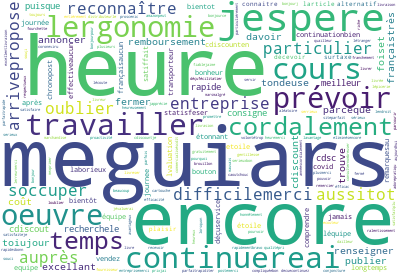

In [55]:
fig = px.imshow(my_wordcloud, template='ggplot2')
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)

In [ ]:
 alltweets = " ".join(tweet for tweet in liked_twt)

    # generate wordcloud from all tweets
    my_wordcloud = WordCloud(
        stopwords=stopwords,
        background_color='white',
        height=275
    ).generate(alltweets)

    # visualize wordcloud inside plotly figure
    fig = px.imshow(my_wordcloud, template='ggplot2')
    fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)